In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os


In [ ]:
pip install pretrainedmodels

     |████████████████████████████████| 61kB 5.1MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp37-none-any.whl size=60966 sha256=6ff65a885d3da3adfdf990a97f6477d34bd241c0eeaf137f8c78727a60fc858f
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels


In [ ]:
from torchvision.models import *
from fastai import *
from fastai.vision import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta
import fastai
import sys
import torch
fastai.__version__

'1.0.61'

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving a8725fd0b96811eb.zip to a8725fd0b96811eb.zip


In [ ]:
import zipfile
import io
data = zipfile.ZipFile(io.BytesIO(uploaded['a8725fd0b96811eb.zip']), 'r')
data.extractall()

In [ ]:
path = 'dataset'
train_data_dir = 'dataset/trainImages'
test_data_dir = 'dataset/testImages'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r'/content/dataset/train.csv')

In [ ]:
df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


In [ ]:
df2 =df[['Image_path','Condition']]


In [ ]:
df2.head()

,Image_path,Condition
0,img_4513976.jpg,0
1,img_7764995.jpg,1
2,img_451308.jpg,0
3,img_7768372.jpg,1
4,img_7765274.jpg,1


In [ ]:
test2 =  pd.read_csv(r'/content/dataset/test.csv')

In [ ]:
test = pd.DataFrame()


In [ ]:
test = test2[['Image_path']]


In [ ]:
test["Condition"] = ""

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test.head()

,Image_path,Condition
0,img_4538519.jpg,
1,img_7766002.jpg,
2,img_4637390.jpg,
3,img_4516108.jpg,
4,img_4517008.jpg,


In [ ]:
from PIL import Image

In [ ]:

train_data_dir ='dataset/trainImages/'

In [ ]:

train_images=np.array(df2.iloc[:,0])
imagearr=[]
for i in train_images:
    img=Image.open(train_data_dir+i).convert('L')
    # L mode image, that means it is a single chaTableau for Data Visualization, Keras,nnel image - normally interpreted as greyscale. 
    img=img.resize((150,150),Image.ANTIALIAS)
    #PIL.Image.ANTIALIAS (a high-quality downsampling filter)
    imagearr.append(np.array(img))

(1399, 150, 150, 1)


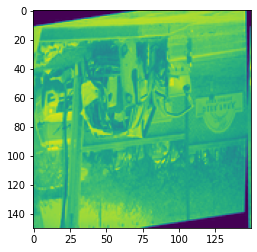

In [ ]:

import matplotlib.pyplot as plt

trainImages = np.array([i for i in imagearr]).reshape(-1,150, 150, 1)
print(trainImages.shape)
plt.imshow(np.asarray(imagearr)[4])

In [ ]:
img_dir='dataset/testImages/'
test_images=np.array(test.iloc[:,0])
imagearr=[]
for i in test_images:
    img=Image.open(img_dir+i).convert('L')
    img=img.resize((150,150),Image.ANTIALIAS)
    imagearr.append(np.array(img))

In [ ]:
# np.asarray(imagearr)
testImages = np.array([i for i in imagearr]).reshape(-1,150,150, 1)
print(testImages.shape)

(600, 150, 150, 1)


In [ ]:
trainLabels = df2['Condition'].values
from keras.utils import np_utils
trainLabels.shape
trainLabels = np_utils.to_categorical(trainLabels)


In [ ]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers. normalization import BatchNormalization
import numpy as np

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (5, 5), activation='relu', input_shape=(150,150, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
#model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
#model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 146, 146, 32)      832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 73, 73, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 69, 69, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 34, 34, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 34, 34, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
model.fit(trainImages, trainLabels, batch_size = 100, epochs = 200, verbose = 1)

Epoch 1/200
14/14 [==============================] - 40s 204ms/step - loss: 0.3433 - accuracy: 0.8914
Epoch 2/200
14/14 [==============================] - 1s 83ms/step - loss: 0.2187 - accuracy: 0.9301
Epoch 3/200
14/14 [==============================] - 1s 83ms/step - loss: 0.2354 - accuracy: 0.9310
Epoch 4/200
14/14 [==============================] - 1s 83ms/step - loss: 0.2081 - accuracy: 0.9359
Epoch 5/200
14/14 [==============================] - 1s 83ms/step - loss: 0.1597 - accuracy: 0.9411
Epoch 6/200
14/14 [==============================] - 1s 83ms/step - loss: 0.1213 - accuracy: 0.9652
Epoch 7/200
14/14 [==============================] - 1s 84ms/step - loss: 0.0948 - accuracy: 0.9701
Epoch 8/200
14/14 [==============================] - 1s 83ms/step - loss: 0.0956 - accuracy: 0.9750
Epoch 9/200
14/14 [==============================] - 1s 83ms/step - loss: 0.0733 - accuracy: 0.9804
Epoch 10/200
14/14 [==============================] - 1s 83ms/step - loss: 0.0769 - accuracy: 0.97

In [ ]:
predictions = model.predict_classes(testImages)
predictions

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([1, 1, 1, 1, ..., 1, 0, 1, 1])

In [ ]:
test['Conditions']=predictions
test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Image_path,Condition,Conditions
0,img_4538519.jpg,,1
1,img_7766002.jpg,,1
2,img_4637390.jpg,,1
3,img_4516108.jpg,,1
4,img_4517008.jpg,,1


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier as rcf
from sklearn.tree import DecisionTreeClassifier as dct
from sklearn.model_selection import cross_val_score
#from lightgbm import LGBMClassifier as lgb
from sklearn.tree import DecisionTreeClassifier as dct
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, roc_auc_score, roc_curve
#from catboost import CatBoostClassifier, Pool

In [3]:
df = pd.read_csv(r'C:\Users\hemanth.kumar\Downloads\DATA\New folder\dataset\train.csv')
test2 = pd.read_csv(r'C:\Users\hemanth.kumar\Downloads\DATA\New folder\dataset\test2.csv')

In [4]:
test2.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition
0,img_4511084.jpg,AA,47200,1180.0,29-07-2026,41101.68,0
1,img_4511787.jpg,BQ,27000,675.0,13-07-2023,23527.68,0
2,img_4512558.jpg,RE,47900,1197.5,27-08-2027,41710.68,0
3,img_4513036.jpg,C,26800,670.0,04-09-2028,23353.68,1
4,img_4513264.jpg,O,41000,1025.0,12-01-2028,35707.68,1


In [5]:
df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


In [6]:
df.describe()

,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount
count,1310.000000,1310.000000,1310.000000,1399.000000,1388.000000
mean,37454.274809,936.356870,11242.925160,0.929235,4117.144092
std,8921.428143,223.035704,7163.735952,0.256523,3151.516223
min,11100.000000,277.500000,2853.000000,0.000000,-999.000000
25%,29800.000000,745.000000,7603.000000,1.000000,1641.750000
50%,37300.000000,932.500000,9678.000000,1.000000,4070.000000
75%,45175.000000,1129.375000,11703.000000,1.000000,6039.500000
max,53500.000000,1337.500000,46495.680000,1.000000,59844.000000


In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 4.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm


In [40]:
df.isnull().sum()

Image_path            0
Insurance_company     0
Cost_of_vehicle      89
Min_coverage         89
Expiry_date           0
Max_coverage         89
Condition             0
Amount               11
dtype: int64

In [41]:
print (df.shape)
print (test2.shape)

(1399, 8)
(600, 7)


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

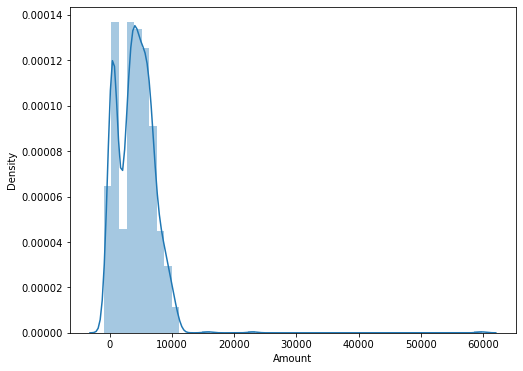

In [42]:
import seaborn as sns
sns.distplot(df['Amount'])

In [43]:
# Daat Contains Outliers 

In [44]:
df.describe()

,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount
count,1310.000000,1310.000000,1310.000000,1399.000000,1388.000000
mean,37454.274809,936.356870,11242.925160,0.929235,4117.144092
std,8921.428143,223.035704,7163.735952,0.256523,3151.516223
min,11100.000000,277.500000,2853.000000,0.000000,-999.000000
25%,29800.000000,745.000000,7603.000000,1.000000,1641.750000
50%,37300.000000,932.500000,9678.000000,1.000000,4070.000000
75%,45175.000000,1129.375000,11703.000000,1.000000,6039.500000
max,53500.000000,1337.500000,46495.680000,1.000000,59844.000000


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Amount'>

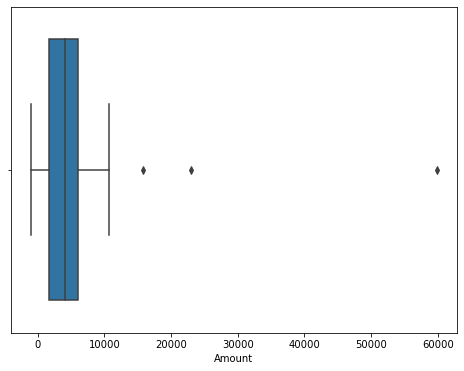

In [45]:
sns.boxplot(df['Amount'])

In [46]:
miss = df.isnull().sum()/len(df)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Amount             0.007863
Cost_of_vehicle    0.063617
Min_coverage       0.063617
Max_coverage       0.063617
dtype: float64

In [47]:
miss = test2.isnull().sum()/len(test2)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Series([], dtype: float64)

In [48]:
df.dtypes

Image_path            object
Insurance_company     object
Cost_of_vehicle      float64
Min_coverage         float64
Expiry_date           object
Max_coverage         float64
Condition              int64
Amount               float64
dtype: object

In [8]:
numeric_data = df.select_dtypes(include=[np.number])
cat_data = df.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 5 numeric and 3 categorical columns in train data


<AxesSubplot:>

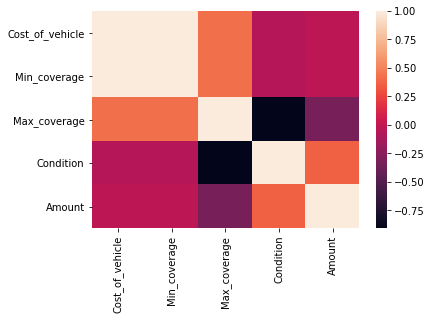

In [9]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

In [51]:
print (corr['Amount'].sort_values(ascending=False))


Amount             1.000000
Condition          0.362180
Min_coverage      -0.020802
Cost_of_vehicle   -0.020802
Max_coverage      -0.330780
Name: Amount, dtype: float64


In [52]:
# Except Condition rest of features have less % of correaltion with Target Variable

In [53]:
# Using Date Column create new features 

In [14]:
from datetime import datetime


In [15]:

df['Expiry_date'] = pd.to_datetime(df['Expiry_date'])
test2['Expiry_date'] = pd.to_datetime(df['Expiry_date'])

In [16]:
df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


In [17]:
now = datetime.now()
df["Expiry_years"] = df["Expiry_date"].apply(lambda x : (x.year-pd.datetime.now().year ))
test2["Expiry_years"] = test2["Expiry_date"].apply(lambda x : (x.year-pd.datetime.now().year ))

<ipython-input-17-a3a2fddce3ef>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df["Expiry_years"] = df["Expiry_date"].apply(lambda x : (x.year-pd.datetime.now().year ))
<ipython-input-17-a3a2fddce3ef>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  test2["Expiry_years"] = test2["Expiry_date"].apply(lambda x : (x.year-pd.datetime.now().year ))


In [18]:
df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount,Expiry_years
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0,5
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0,4
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0,1
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0,1
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0,5


<AxesSubplot:>

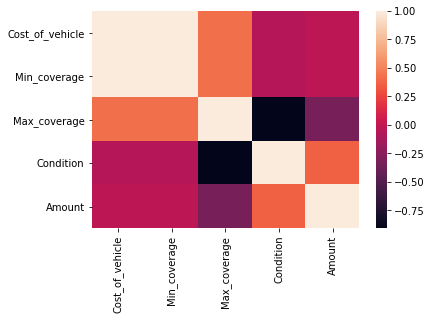

In [19]:
corr = numeric_data.corr()
sns.heatmap(corr)

In [20]:
print (corr['Amount'].sort_values(ascending=False))

Amount             1.000000
Condition          0.362180
Min_coverage      -0.020802
Cost_of_vehicle   -0.020802
Max_coverage      -0.330780
Name: Amount, dtype: float64


<AxesSubplot:xlabel='Expiry_years', ylabel='Amount'>

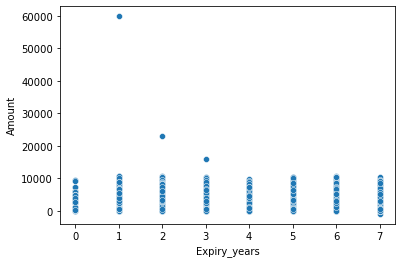

In [21]:
sns.scatterplot(x =df['Expiry_years'],y = df['Amount'])

<AxesSubplot:xlabel='Expiry_years', ylabel='Max_coverage'>

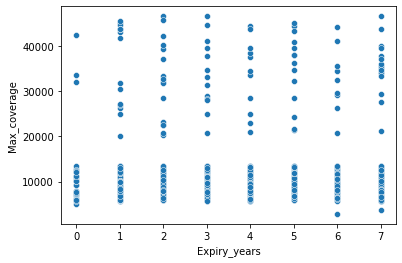

In [22]:
sns.scatterplot(x =df['Expiry_years'],y = df['Max_coverage'])

<AxesSubplot:xlabel='Expiry_years', ylabel='Min_coverage'>

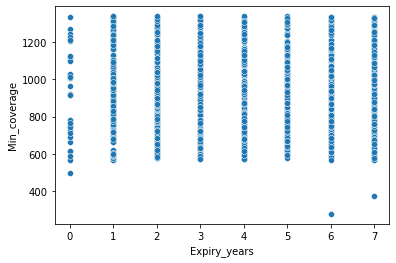

In [23]:
sns.scatterplot(x =df['Expiry_years'],y = df['Min_coverage'])

<AxesSubplot:xlabel='Cost_of_vehicle', ylabel='Max_coverage'>

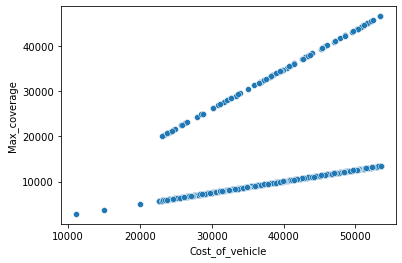

In [24]:
sns.scatterplot(x =df['Cost_of_vehicle'],y = df['Max_coverage'])

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 71.8% of the points cannot be placed; you may want to decrease the size of the 

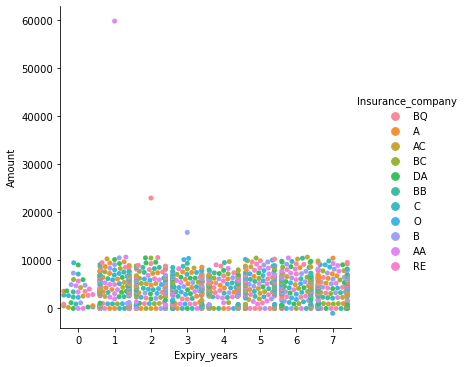

In [25]:
sns.catplot(x="Expiry_years", y="Amount", hue="Insurance_company", kind="swarm", data=df)

In [26]:
# Here no pattern we are not find

In [27]:
# Removing outliers from the  data


In [28]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Cost_of_vehicle    15375.000
Min_coverage         384.375
Max_coverage        4100.000
Condition              0.000
Amount              4397.750
Expiry_years           4.000
dtype: float64


In [29]:
df.shape

(1399, 9)

In [30]:
# Position of the Outlier
print(np.where(df['Amount']>10000))

(array([  39,  176,  195,  278,  304,  405,  418,  542,  550,  575,  620,
        764,  786,  884,  954,  955, 1082, 1168, 1173, 1227, 1324],
      dtype=int64),)


In [38]:
new_df = df[(df['Amount'] <10000)]
new_df.shape

(1367, 9)

In [39]:
#Detecting Multicollinearity between independent variables (VIF) 

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [40]:
X = corr
calc_vif(X)

C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Cost_of_vehicle,inf
1,Min_coverage,inf
2,Max_coverage,2562.945651
3,Condition,1812.818973
4,Amount,1.813537


In [41]:
X = corr.drop(['Max_coverage'],axis=1)
calc_vif(X)

C:\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Cost_of_vehicle,inf
1,Min_coverage,inf
2,Condition,1.878202
3,Amount,1.770504


In [42]:
#Missing values Imputation

df1.isnull().sum()

NameError: name 'df1' is not defined

In [43]:
train = df.copy()

In [44]:
df.fillna(train['Cost_of_vehicle'].mean(), inplace = True)
df.fillna(train['Amount'].mean(), inplace = True)
df.fillna(train['Min_coverage'].mean(), inplace = True)
df.fillna(train['Max_coverage'].mean(), inplace = True)

In [45]:
train.fillna(train['Cost_of_vehicle'].mean(), inplace = True)
train.fillna(train['Amount'].mean(), inplace = True)
train.fillna(train['Min_coverage'].mean(), inplace = True)
train.fillna(train['Max_coverage'].mean(), inplace = True)

In [47]:

train_copy = train[['Insurance_company','Cost_of_vehicle','Min_coverage','Condition','Expiry_years','Amount']]

test_copy = test2[['Insurance_company','Cost_of_vehicle','Min_coverage','Condition','Expiry_years']]

In [48]:
train_copy = pd.get_dummies(train_copy)
test_copy = pd.get_dummies(test_copy)

In [49]:
from sklearn.model_selection import train_test_split
y = train_copy['Amount']
X = train_copy.drop(['Amount'],axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score

In [141]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 9],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [142]:
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.01,
        max_depth = 3,
        min_child_weight = 3,
        n_estimators = 500,
        subsample = 0.7)

%time xgb_model.fit(X_train, y_train, verbose=False)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = r2_score(y_test, y_pred_xgb)

print("r2_score: ", mae_xgb)

Wall time: 550 ms
r2_score:  0.05933647319935642


In [149]:
y_pred_test = xgb_model.predict(test_copy)

In [150]:

test_df['Amount'] =  y_pred_test 

In [152]:
test_df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4538519.jpg,B,23600,590.0,12-04-2025,5978.0,1,388.195984
1,img_7766002.jpg,C,28300,707.5,24-08-2028,7153.0,1,291.956116
2,img_4637390.jpg,AC,43700,1092.5,28-11-2023,11003.0,1,288.762878
3,img_4516108.jpg,BB,46100,1152.5,04-02-2028,11603.0,1,2761.626221
4,img_4517008.jpg,BB,40700,1017.5,03-01-2022,10253.0,1,3565.558105


In [154]:
sub = test_df[['Image_path','Condition','Amount']]


In [155]:
sub.to_csv(r'C:\Users\hemanth.kumar\Downloads\DATA\New folder\dataset\out.csv',index = False)

In [156]:
train_copy = train[['Insurance_company','Cost_of_vehicle','Min_coverage','Condition','Expiry_years','Amount']]

test_copy = test2[['Insurance_company','Cost_of_vehicle','Min_coverage','Condition','Expiry_years']]

In [157]:
train_copy = pd.get_dummies(train_copy)
test_copy = pd.get_dummies(test_copy)

In [159]:
from sklearn.model_selection import train_test_split
y = train_copy['Amount']
X = train_copy.drop(['Amount'],axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [160]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.01,
        max_depth = 3,
        min_child_weight = 3,
        n_estimators = 500,
        subsample = 0.7)

%time xgb_model.fit(X_train, y_train, verbose=False)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = r2_score(y_test, y_pred_xgb)

print("r2_score: ", mae_xgb)

Wall time: 508 ms
r2_score:  0.15443640598641595


In [161]:
y_pred_test = xgb_model.predict(test_copy)

In [162]:
test_df['Amount'] =  y_pred_test 

In [163]:
sub = test_df[['Image_path','Condition','Amount']]
sub.to_csv(r'C:\Users\hemanth.kumar\Downloads\DATA\New folder\dataset\out1.csv',index = False)